Primeras filas del dataframe:
                          Profesión   1    2    3   4   5
0                     Agricultures    5    6    7   4   3
1        Patrón empresa o comercio   28   32   44  22  18
2  Profes. liberales y científicas   22   26   15  10   3
3                        Empleados   75  107  133  78  31
4          Profesiones intermedias   14   20   26   6   3

Dataframe ajustado (primeras filas):
                                   1    2    3   4   5
Profesión                                             
Agricultures                       5    6    7   4   3
Patrón empresa o comercio         28   32   44  22  18
Profes. liberales y científicas   22   26   15  10   3
Empleados                         75  107  133  78  31
Profesiones intermedias           14   20   26   6   3

Porcentaje de inercia conservada por cada eje:
Eje 1: 0.8747
Eje 2: 0.1253


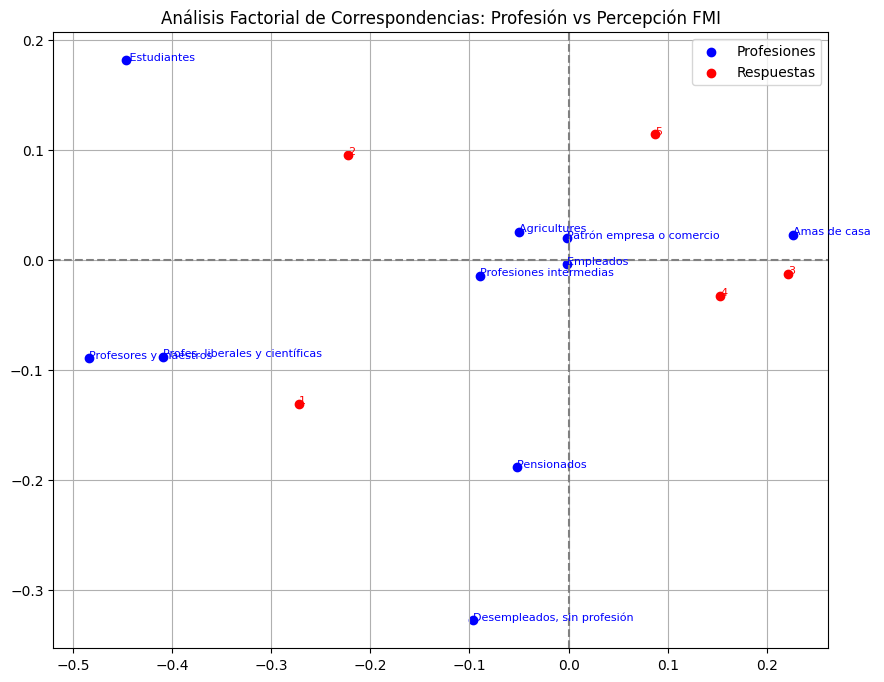


✅ Profesión que más aporta al primer eje: Amas de casa 
✅ Respuesta (nivel 1-5) que más aporta al primer eje: 3


In [16]:
#-----------------------------------
# 1. Importar librerías
#-----------------------------------
import pandas as pd
import prince
import matplotlib.pyplot as plt

#-----------------------------------
# 2. Cargar los datos
#-----------------------------------
# Ajusta el path si tu archivo está en otro lugar
archivo = 'Datos.xlsx'

# Leer la hoja correspondiente
df = pd.read_excel(archivo, sheet_name='3.Profesión-FMI')

# Mostrar las primeras filas para ver la estructura
print("Primeras filas del dataframe:")
print(df.head())

# Ajustar: poner la primera columna (Profesión) como índice
df.set_index(df.columns[0], inplace=True)

# Confirmar
print("\nDataframe ajustado (primeras filas):")
print(df.head())
#-----------------------------------
# 4. Aplicar Análisis Factorial de Correspondencias
#-----------------------------------
# Inicializar modelo CA
ca = prince.CA(
    n_components=2,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',   # <-- Usamos 'sklearn', que sí acepta
    random_state=42
)


# Ajustar modelo
ca = ca.fit(df)

#-----------------------------------
# 5. Inercia conservada
#-----------------------------------
print("\nPorcentaje de inercia conservada por cada eje:")

# En tu versión de prince se puede calcular así:
inercia = ca.eigenvalues_ / ca.eigenvalues_.sum()

for i, porcentaje in enumerate(inercia):
    print(f"Eje {i+1}: {porcentaje:.4f}")


#-----------------------------------
# 6. Graficar manualmente los dos primeros planos factoriales
#-----------------------------------
# Obtener coordenadas de las filas (profesiones) y columnas (respuestas)
row_coords = ca.row_coordinates(df)
col_coords = ca.column_coordinates(df)

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 8))

# Dibujar las profesiones (filas)
ax.scatter(row_coords[0], row_coords[1], label="Profesiones", color='blue')
for i, txt in enumerate(row_coords.index):
    ax.annotate(txt, (row_coords.iloc[i, 0], row_coords.iloc[i, 1]), fontsize=8, color='blue')

# Dibujar las respuestas (columnas)
ax.scatter(col_coords[0], col_coords[1], label="Respuestas", color='red')
for i, txt in enumerate(col_coords.index):
    ax.annotate(txt, (col_coords.iloc[i, 0], col_coords.iloc[i, 1]), fontsize=8, color='red')

ax.axhline(0, color='gray', linestyle='--')
ax.axvline(0, color='gray', linestyle='--')
ax.set_title('Análisis Factorial de Correspondencias: Profesión vs Percepción FMI')
ax.legend()
plt.grid()
plt.show()


#-----------------------------------
# 7. Analizar contribuciones de filas y columnas
#-----------------------------------
# Perfil fila: profesiones
fila_contribuciones = ca.row_contributions_.iloc[:, 0]  # primer eje
max_fila = fila_contribuciones.idxmax()

# Perfil columna: respuestas 1-5
columna_contribuciones = ca.column_contributions_.iloc[:, 0]  # primer eje
max_columna = columna_contribuciones.idxmax()

print(f"\n✅ Profesión que más aporta al primer eje: {max_fila}")
print(f"✅ Respuesta (nivel 1-5) que más aporta al primer eje: {max_columna}")
